In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx

In [2]:
def get_netflix_data():
  netflix_data = pd.read_csv("netflix_titles.csv")
  netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
  
  return netflix_data

**Problem 1**

<ipython-input-3-d9dc29b7f031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].fillna('0')
<ipython-input-3-d9dc29b7f031>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.split(' ').str[0].astype(int)


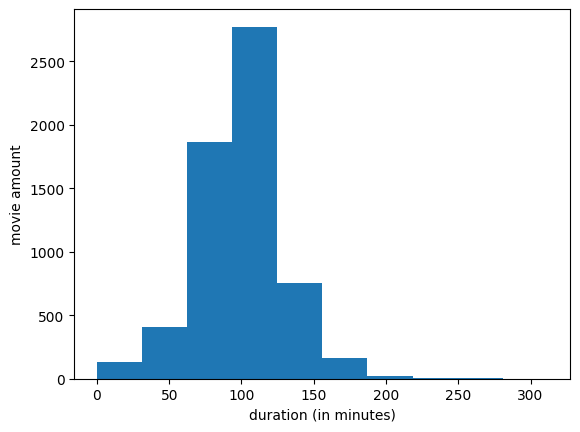

In [3]:
netflix_data = get_netflix_data()
#reading just the titles which type is movie
movies = netflix_data[netflix_data['type']== 'Movie']

#converting movie durations into integer for the histogram and also replacing "nan" values with "0"
#below code inspired from kaggle.
movies['duration'] = movies['duration'].fillna('0')
movies['duration'] = movies['duration'].str.split(' ').str[0].astype(int)

plt.hist(movies['duration'])
plt.xlabel('duration (in minutes)')
plt.ylabel('movie amount')
plt.show()

**Problem 2**

In [39]:
#check what types of ratings there are before replacing them with numericals.
print(movies.rating.unique())

[13  7 18 14  3 17  1  0]


In [38]:
#changing movie ratings to approximated age values and also changed unsuitable values as blank
#this needs to be run twice for some reason since it throws an error on the first run
movies['rating'] = movies['rating'].str.replace('74 min', '0')
movies['rating'] = movies['rating'].str.replace('84 min', '0')
movies['rating'] = movies['rating'].str.replace('66 min', '0')
movies['rating'] = movies['rating'].fillna('0')
movies['rating'] = movies['rating'].str.replace('NR', '1')
movies['rating'] = movies['rating'].str.replace('NC-17', '18')
movies['rating'] = movies['rating'].str.replace('N17', '18')
movies['rating'] = movies['rating'].str.replace('U17', '18')
movies['rating'] = movies['rating'].str.replace('PG-13', '13')
movies['rating'] = movies['rating'].str.replace('PG', '7')
movies['rating'] = movies['rating'].str.replace('TV-MA', '18')
movies['rating'] = movies['rating'].str.replace('TV-Y7-FV', '7')
movies['rating'] = movies['rating'].str.replace('TV-Y7', '7')
movies['rating'] = movies['rating'].str.replace('TV-7', '7')
movies['rating'] = movies['rating'].str.replace('TV-Y', '3')
movies['rating'] = movies['rating'].str.replace('TV-G', '1')
movies['rating'] = movies['rating'].str.replace('G', '1')
movies['rating'] = movies['rating'].str.replace('TV-14', '14')
movies['rating'] = movies['rating'].str.replace('R', '17')

movies['rating'] = movies['rating'].astype(int)

<ipython-input-38-e43540efba0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating'] = movies['rating'].str.replace('74 min', '0')
<ipython-input-38-e43540efba0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating'] = movies['rating'].str.replace('84 min', '0')
<ipython-input-38-e43540efba0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [7]:
#Calculating pearson correlation and p-value between movie rating and movie duration.
sp.stats.pearsonr(movies['rating'], movies['duration'])

PearsonRResult(statistic=0.18646373768412655, pvalue=4.350788450531765e-49)

**Problem 3**

In [8]:
netflix_data['cast'] = netflix_data['cast'].fillna('No Actors')
movies = netflix_data[netflix_data['type'] == 'Movie']

In [9]:
print(movies['cast'])

0                                               No Actors
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7       Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
9       Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
12      Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 6131, dtype: object


In [10]:
def weight_between_nodes(movie1, movie2):
  movie_cast = netflix_data.at[netflix_data.index[movie1], 'cast']
  movie_cast1 = netflix_data.at[netflix_data.index[movie2], 'cast']
  
  movie_casts = []
  for actor in movie_cast.strip().split(','):
    movie_casts.append(actor)
  for actor in movie_cast1.strip().split(','):
    movie_casts.append(actor)

  common_actors = {i:movie_casts.count(i) for i in movie_casts}
  weight = 0
  for actor, i in common_actors.items():
    if i > 1:
      weight = weight + 1
  return weight

In [11]:
G = nx.Graph()
for i, rowi in movies.iterrows():
  G.add_node(i)

In [12]:
nodes = []
for node in G.nodes():
  if node == node:
    nodes.append(node)
#later noticed there is bug with these two nodes for some reason...
G.remove_node(nodes[1061])
G.remove_node(nodes[3906])
nodes = []
for node in G.nodes():
  if node == node:
    nodes.append(node)

In [14]:
#loop for adding edged to nodes with common actors, if there is no common actors there is no edge
# WARNING!!! this loop section takes long time to execute took me 13 minutes!!!
for i in range(len(nodes)):
  for j in range(len(nodes)):
    if nodes[i] != nodes[j]:
      if (G.has_edge(nodes[i], nodes[j]) or G.has_edge(nodes[j], nodes[i]))  == False:
        w = weight_between_nodes(nodes[i], nodes[j])
        if w > 0:
          G.add_edge(nodes[i], nodes[j], weight=w)

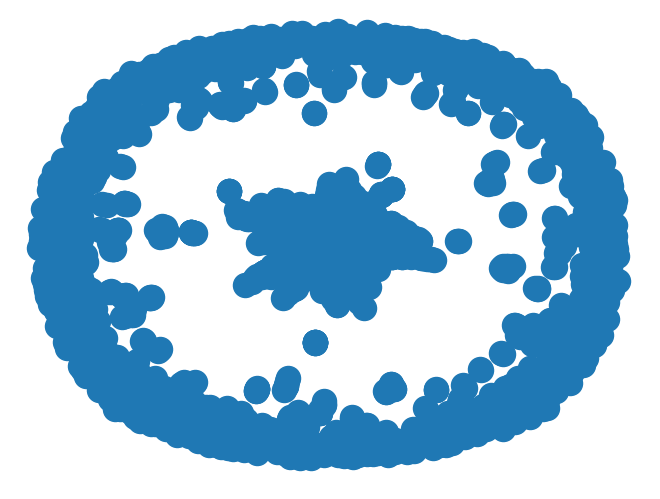

In [15]:
#drawing the unusable graph due to the size.
nx.draw(G)

In [16]:
len(G.nodes)

6129

In [17]:
netflix_data.at[netflix_data.index[nodes[8]], 'title']

'Avvai Shanmughi'

In [18]:
sub_G = nx.Graph()

In [19]:
for n, m in G.edges(nodes[8]):
  edge_data = G.get_edge_data(n, m)
  sub_G.add_edge(n, m, weight = edge_data['weight'])

{(22, 24): Text(-0.2791625349876906, 0.38262288872239475, '1'),
 (22, 26): Text(0.059879610608069775, -0.20681372690317026, '2'),
 (22, 3530): Text(0.44781060815128065, 0.10070628253746994, '1'),
 (22, 3975): Text(-0.06682740907316014, 0.48241773475032257, '1'),
 (22, 4481): Text(-0.48903631581884155, -0.025334833572262412, '1'),
 (22, 5334): Text(0.049826759026439134, -0.4981075858839256, '1'),
 (22, 5335): Text(-0.3983232845381439, -0.24867999452513537, '1'),
 (22, 5336): Text(-0.4375543955147571, 0.21081105988821744, '1'),
 (22, 5337): Text(0.16526732826390667, 0.4447481939675126, '1'),
 (22, 5338): Text(0.3238962226094899, -0.3678896912247019, '1'),
 (22, 5339): Text(-0.22782097975115198, -0.43573702456673497, '1'),
 (22, 7162): Text(0.4733392844801428, -0.1422086155441799, '1'),
 (22, 7917): Text(0.3715330959618547, 0.32617428174708496, '1')}

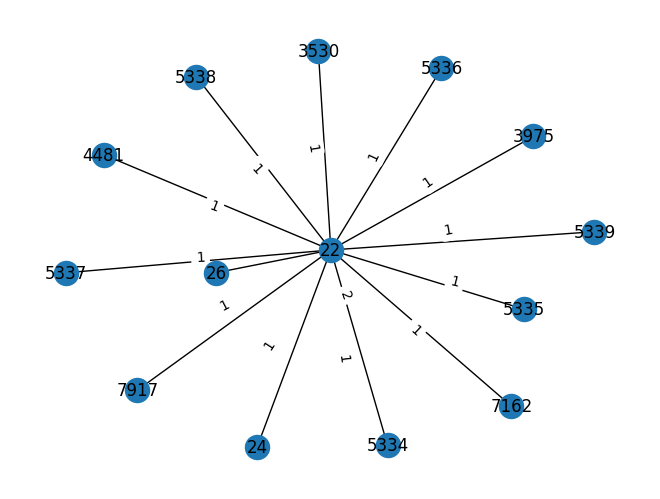

In [20]:
nx.draw(sub_G, with_labels=True)
nx.draw_networkx_edge_labels(sub_G, nx.spring_layout(sub_G), edge_labels=nx.get_edge_attributes(sub_G, 'weight'))

In [21]:
print(netflix_data.at[netflix_data.index[22], 'title'])
print(netflix_data.at[netflix_data.index[24], 'title'])
print(netflix_data.at[netflix_data.index[26], 'title'])
print(netflix_data.at[netflix_data.index[3530], 'title'])
print(netflix_data.at[netflix_data.index[3975], 'title'])
print(netflix_data.at[netflix_data.index[4481], 'title'])
print(netflix_data.at[netflix_data.index[5334], 'title'])
print(netflix_data.at[netflix_data.index[5335], 'title'])
print(netflix_data.at[netflix_data.index[5336], 'title'])
print(netflix_data.at[netflix_data.index[5337], 'title'])
print(netflix_data.at[netflix_data.index[5338], 'title'])
print(netflix_data.at[netflix_data.index[5339], 'title'])
print(netflix_data.at[netflix_data.index[6013], 'title'])
print(netflix_data.at[netflix_data.index[7162], 'title'])
print(netflix_data.at[netflix_data.index[7917], 'title'])

Avvai Shanmughi
Jeans
Minsara Kanavu
Article 15
Sei
Baahubali: The Beginning (English Version)
Baahubali 2: The Conclusion (Hindi Version)
Baahubali 2: The Conclusion (Malayalam Version)
Baahubali 2: The Conclusion (Tamil Version)
Baahubali: The Beginning (Hindi Version)
Baahubali: The Beginning (Malayalam Version)
Baahubali: The Beginning (Tamil Version)
300 Miles to Heaven
Kabali (Hindi Version)
Sadma


**problem 4**

In [22]:
#number of singleton nodes
print(len(list(nx.isolates(G))))

803


In [23]:
#largest component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(G0)

Graph with 4483 nodes and 38225 edges


In [ ]:
#number of components and their sizes
n_components = nx.number_connected_components(G)
print("number of components:", n_components)

for component in nx.connected_components(G):
    print(len(component))

In [76]:
#diameter of the network
print(nx.is_connected(G))
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
largest_diameter = 0
avg_path = 0
for graph in S:
  diameter = nx.diameter(graph)
  avg_s_path = nx.average_shortest_path_length(graph)
  if diameter > largest_diameter:
    largest_diameter = diameter
  if avg_s_path > avg_path:
    avg_path = avg_s_path
print("largest diameter: ", largest_diameter)
print("longest average shortest path: ", avg_path)

False
total diameter:  161
largest diameter:  17
longest shortest path:  4.826548168533554


In [26]:
#average path length
print(nx.average_clustering(G))

0.3537810311919283


**Problem 5**

In [28]:
c = list(nx.community.k_clique_communities(G, 2))

In [29]:
len(c)

126

In [ ]:
#returns error that 'partition' is not a valid partition of the nodes of G
nx.community.partition_quality(G, c)

In [31]:
l = list(nx.community.louvain_communities(G))

In [32]:
len(l)

950

In [33]:
nx.community.partition_quality(G, l)

(0.9953586776859504, 0.821303889781363)

**Problem 6**

In [40]:
community_data = {}
i = 0
for community in l:
  rating_sum = 0
  ratings = []
  for index in community:
    rating_sum = rating_sum + movies.at[netflix_data.index[index], 'rating']
    ratings.append(movies.at[netflix_data.index[index], 'rating'])
  community_data[i] = [rating_sum / len(community), np.std(ratings)]
  i = i + 1

In [41]:
community_data[0]

[12.505263157894737, 5.678535178446392]

In [42]:
max_std = 0
max_std_id = 0
min_std = community_data[0][1]
min_std_id = 0
for key in community_data:
  if community_data[key][1] > max_std:
    max_std = community_data[key][1]
    max_std_id = key
  if community_data[key][1] < min_std:
    min_std = community_data[key][1]
    min_std_id = key

In [44]:
print(max_std)
print(max_std_id)

8.5
668


In [45]:
print(min_std)
print(min_std_id)

0.0
1


**Problem 7**

In [46]:
community_word_data = {}
i = 0
for community in l:
  word_sum = 0
  words = []
  for index in community:
    for word in movies.at[netflix_data.index[index], 'description'].split():
      words.append(word)
  word_values = pd.value_counts(np.array(words))
  for element in word_values:
    if element > 1:
      word_sum = word_sum + 1
  community_word_data[i] = word_sum
  i = i + 1

In [47]:
community_word_data[0]

1119

In [48]:
max_words = 0
max_words_id = 0
min_words = community_word_data[0]
min_words_id = 0
for key in community_word_data:
  if community_word_data[key] > max_words:
    max_words = community_word_data[key]
    max_words_id = key
  if community_word_data[key] < min_words:
    min_words = community_word_data[key]
    min_words_id = key

In [49]:
print(max_words)
print(max_words_id)

4965
581


In [50]:
print(min_words)
print(min_words_id)

0
3


**Problem 8**

In [126]:
Y = nx.gnp_random_graph(6129, 0.000095)
print(nx.is_connected(Y))
SG = [Y.subgraph(c).copy() for c in nx.connected_components(Y)]
largest_diameter = 0
avg_path = 0
for graph in SG:
  diameter = nx.diameter(graph)
  avg_s_path = nx.average_shortest_path_length(graph)
  if diameter > largest_diameter:
    largest_diameter = diameter
  if avg_s_path > avg_path:
    avg_path = avg_s_path
print("largest diameter: ", largest_diameter)
print("longest average shortest path: ", avg_path)

False
largest diameter:  11
longest average shortest path:  4.726315789473684


probabilty after some testing to get similar diameter and shortest path is: 0.000095

**Previous graph diameter and average shortest path**

largest diameter:  17

longest average shortest path:  4.826548168533554